# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## The Data
Read the train dataset in to a pandas dataframe

In [5]:
titanic_train = pd.read_csv("train.csv")
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_test = pd.read_csv("test.csv")
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

# Using Train Data

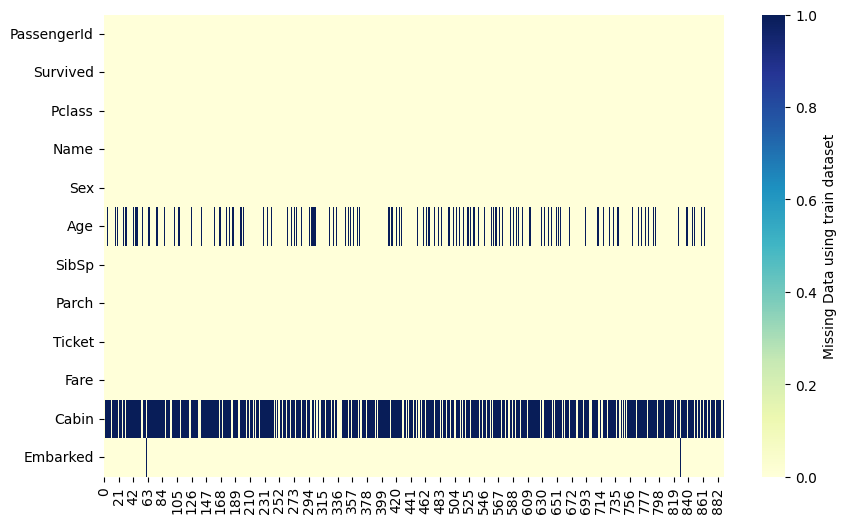

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data using train dataset'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

# Using Test data

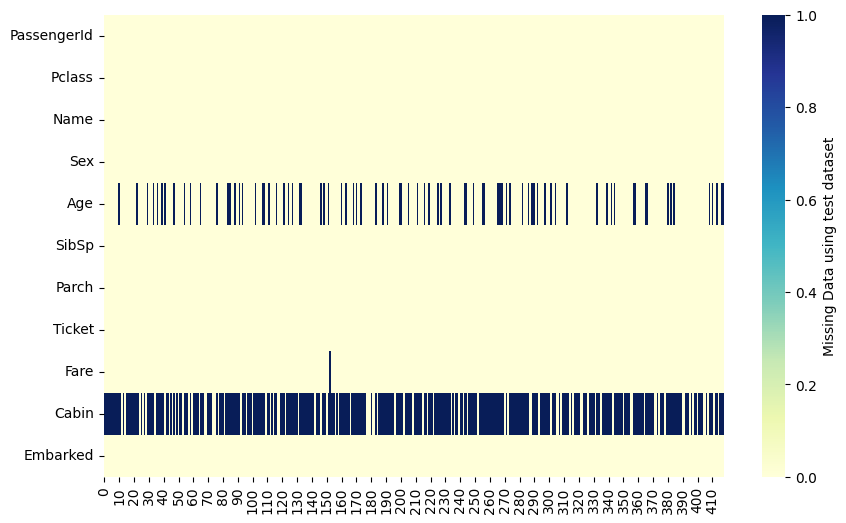

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_test.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data using test dataset'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

# Using Train dataset

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Survived')

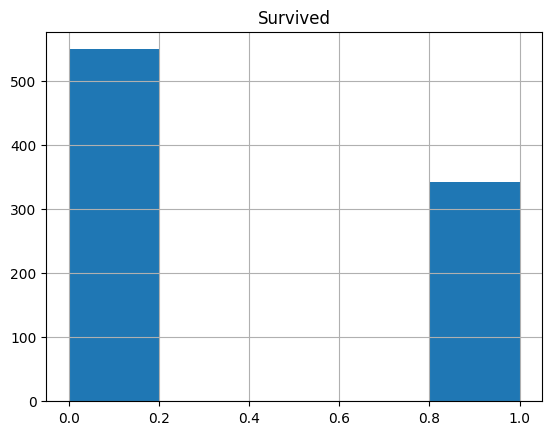

In [10]:
hist_plot = titanic_train["Survived"].hist(bins=5)
hist_plot.set_title("Survived")


Create a histogram for the target variable "Survived" for males and females. 

In [11]:
# Figure size
plt.rc('figure', figsize=(15, 15))
# Histogram bin size
bin_size = 10

# Setup a figue of plots
#fig = plt.figure() 
fig_size = (3, 2)

Text(0, 0.5, 'survival Count')

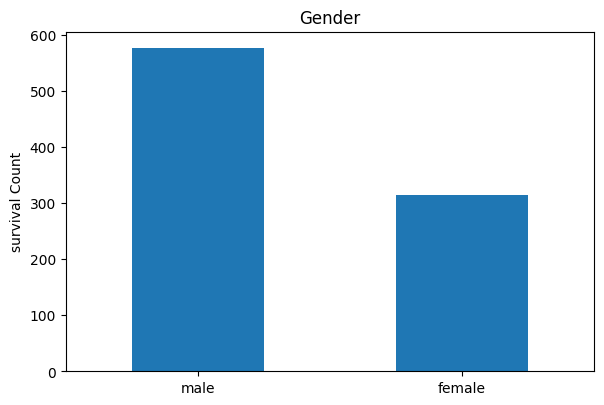

In [12]:
# Plot Gender counts
plt.subplot2grid(fig_size, (1, 0))
titanic_train['Sex'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=0)
plt.ylabel('survival Count')

Create a histogram for the  "Pclass" feature.

# using Train data

Text(0, 0.5, 'survival Count')

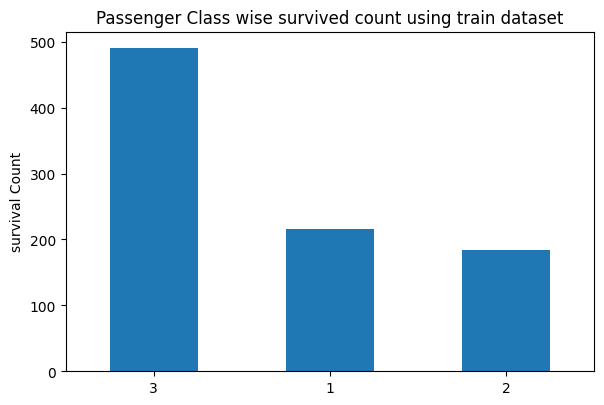

In [13]:
# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
titanic_train['Pclass'].value_counts().plot(kind='bar', title='Passenger Class wise survived count using train dataset')
plt.xticks(rotation=0)
plt.ylabel('survival Count')

# Using Test Data

Text(0, 0.5, 'survival Count for p class')

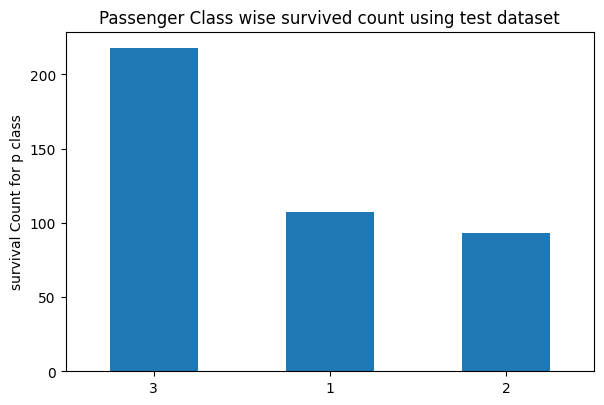

In [14]:
# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
titanic_test['Pclass'].value_counts().plot(kind='bar', title='Passenger Class wise survived count using test dataset')
plt.xticks(rotation=0)
plt.ylabel('survival Count for p class')

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin columna and all the row that have feature Emkarked that is NaN. 

# for train dataset

In [15]:
titanic_train = titanic_train.drop(["Cabin","Name","Ticket"], axis=True)
titanic_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
mean_age = titanic_train["Age"].mean()
titanic_train.fillna({'Age': mean_age}, inplace=True)

In [17]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

# for test dataset

In [18]:
titanic_test = titanic_test.drop(["Cabin","Name","Ticket"], axis=True)
titanic_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [19]:
mean_age = titanic_test["Age"].mean()
titanic_test.fillna({'Age': mean_age}, inplace=True)

In [20]:
titanic_test["Fare"].fillna(titanic_test["Fare"].median(), inplace=True)

In [21]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [22]:
# convert categorical features into numerical ones
titanic_newtrain = pd.get_dummies(titanic_train,columns=["Sex", "Pclass", "Embarked"])
titanic_newtrain.drop(["Sex_female"], axis=1, inplace=True) # surplus feature
titanic_newtrain

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,1,0,7.2500,1,0,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,0,0,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,0,1,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,0,0,1
4,5,0,35.000000,0,0,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,1,0,1,0,0,0,1
887,888,1,19.000000,0,0,30.0000,0,1,0,0,0,0,1
888,889,0,29.699118,1,2,23.4500,0,0,0,1,0,0,1
889,890,1,26.000000,0,0,30.0000,1,1,0,0,1,0,0


In [23]:
titanic_newtest = pd.get_dummies(titanic_test,columns=["Sex", "Pclass", "Embarked"])
titanic_newtest.drop(["Sex_female"], axis=1, inplace=True) # surplus feature
titanic_newtest

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,34.50000,0,0,7.8292,1,0,0,1,0,1,0
1,893,47.00000,1,0,7.0000,0,0,0,1,0,0,1
2,894,62.00000,0,0,9.6875,1,0,1,0,0,1,0
3,895,27.00000,0,0,8.6625,1,0,0,1,0,0,1
4,896,22.00000,1,1,12.2875,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,1,0,0,1,0,0,1
414,1306,39.00000,0,0,108.9000,0,1,0,0,1,0,0
415,1307,38.50000,0,0,7.2500,1,0,0,1,0,0,1
416,1308,30.27259,0,0,8.0500,1,0,0,1,0,0,1


In [29]:
titanic_newtest.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

## Training and Predicting

Train a Logistic Regression model with the training data. 

In [33]:
from sklearn.model_selection import train_test_split
# split into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(
    titanic_newtrain.drop('Survived', axis=1), titanic_newtrain['Survived'], 
    test_size=0.2, random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

C:\Users\BENSON\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
reg.score(X_test, y_test)

0.8100558659217877

In [36]:
y_pred_reg = reg.predict(X_test) 

In [37]:
accuracy_score(y_test,y_pred_reg)

NameError: name 'accuracy_score' is not defined

## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_reg)

array([[88, 11],
       [23, 57]], dtype=int64)

In [39]:
confusion_matrix(y_test, y_pred_reg).ravel()

array([88, 11, 23, 57], dtype=int64)

In [40]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred_reg).ravel()

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred_reg))
print('Precision:', precision_score(y_test, y_pred_reg, average='macro'))
print('Recall:   ', recall_score(y_test, y_pred_reg, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred_reg, average='macro'))

Accuracy:  0.8100558659217877
Precision: 0.8155140434552199
Recall:    0.8006944444444444
F1 Score:  0.8041827541827542


# we are testing on test dataset

In [42]:
reg_pred = reg.predict(titanic_newtest)

In [43]:
result_regpred = pd.DataFrame(reg_pred)
result_regpred.rename(columns={0:'Survived'}, inplace=True)
result_regpredpred = pd.concat([titanic_newtest['PassengerId'], result_regpred], axis=1)
result_regpredpred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
result_regpred["Survived"].value_counts()


0    262
1    156
Name: Survived, dtype: int64

# Support Vector Machines

## Train a Support Vector Classifier

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(kernel='linear', C=30, gamma='auto', random_state=0)

In [47]:
svm.fit(X_train, y_train)

SVC(C=30, gamma='auto', kernel='linear', random_state=0)

In [48]:
svm.score(X_test, y_test)

0.8100558659217877

In [49]:
y_pred_svm = svm.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_svm)

0.8100558659217877

# on test dataset

In [51]:
svm_pred = svm.predict(titanic_newtest)

In [52]:
result_svmpred = pd.DataFrame(svm_pred)
result_svmpred.rename(columns={0:'Survived'}, inplace=True)
result_svmpred = pd.concat([titanic_newtest['PassengerId'], result_svmpred], axis=1)
result_svmpred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [53]:
result_svmpred["Survived"].value_counts()


0    361
1     57
Name: Survived, dtype: int64

## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'C': [1, 10, 100, 1000, 10000], 
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['rbf']} 

In [56]:
grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 1)

In [57]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']},
             verbose=1)

In [58]:
grid.cv_results_

{'mean_fit_time': array([0.01680775, 0.02826109, 0.03140001, 0.0187499 , 0.02908797,
        0.02657566, 0.03524384, 0.02812843, 0.03294578, 0.0657001 ,
        0.0302702 , 0.02792335, 0.07812567, 0.02783408, 0.03195758]),
 'std_fit_time': array([0.00244045, 0.00361121, 0.00029454, 0.00625053, 0.00220776,
        0.00615533, 0.00732905, 0.00624814, 0.00339   , 0.00621661,
        0.00840692, 0.00615961, 0.01397436, 0.00726629, 0.00138925]),
 'mean_score_time': array([0.01361837, 0.00961499, 0.00937295, 0.00624981, 0.01303215,
        0.01583982, 0.00440731, 0.00937147, 0.0108161 , 0.00312438,
        0.00752134, 0.01561937, 0.        , 0.01098795, 0.01398129]),
 'std_score_time': array([3.14108919e-03, 3.19054686e-03, 7.65298151e-03, 7.65442206e-03,
        2.06623420e-03, 5.04964224e-03, 5.72635957e-03, 7.65177441e-03,
        6.31450710e-03, 6.24876022e-03, 7.39851263e-03, 1.10395783e-06,
        0.00000000e+00, 6.23182204e-03, 2.55839474e-03]),
 'param_C': masked_array(data=[1, 1, 1

In [59]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [60]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.001)


In [61]:
grid_predictions = grid.predict(X_test)

# testing on test dataset

In [62]:
grid_pred = grid.predict(titanic_newtest)

In [63]:
result_gridpred = pd.DataFrame(grid_pred)
result_gridpred.rename(columns={0:'Survived'}, inplace=True)
result_gridpred = pd.concat([titanic_newtest['PassengerId'], result_gridpred], axis=1)
result_gridpred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [64]:
result_gridpred["Survived"].value_counts()


0    412
1      6
Name: Survived, dtype: int64

## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75        99
           1       0.76      0.33      0.46        80

    accuracy                           0.65       179
   macro avg       0.70      0.62      0.60       179
weighted avg       0.69      0.65      0.62       179



## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 


In [67]:
i personally believes that Logistic Regression Model Performed better than Support Vector Machine Model 
why because as we seen scores are quite higher in Logistic Regression Than a Support Vector Machine

SyntaxError: invalid syntax (2077300050.py, line 1)